In [5]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from functools import reduce
from operator import add
import matplotlib.pyplot as plt
import seaborn

import src.pipe as pipe
%load_ext autoreload
%autoreload 1
%aimport src.pipe

plt.style.use('fivethirtyeight')
%matplotlib inline


In [18]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df

In [19]:
df.head()

artist                album_id album_type  total_tracks  \
2  "Weird Al" Yankovic  36jlZKG1sNZQA2HbWdYveV      album            12   
3               *NSYNC  20RMokVwJ2wjQ0s8FOdOFC      album            12   
4               *NSYNC  7zBue2Vuzg4Z3ncRXaIkJg      album            13   
5               *NSYNC  20RMokVwJ2wjQ0s8FOdOFC      album            12   
6               *NSYNC  7zBue2Vuzg4Z3ncRXaIkJg      album            13   

  release_date release_date_precision  disc_number  duration_ms  explicit  \
2   2014-07-15                    day            1       223120     False   
3   2000-03-21                    day            1       200400     False   
4   2001-07-24                    day            1       292000     False   
5   2000-03-21                    day            1       192426     False   
6   2001-07-24                    day            1       238426     False   

              title  ...            bb_artist          bb_title        date  \
2       Word Crimes  ...  "Weird Al" Yankovic       Word Crimes  2014-08-02   
3       Bye Bye Bye  ...              'N Sync       Bye Bye Bye  2000-01-29   
4              Gone  ...              'N Sync              Gone  2001-09-22   
5  It's Gonna Be Me  ...              'N Sync  It's Gonna Be Me  2000-05-06   
6               Pop  ...              'N Sync               Pop  2001-06-02   

   peakPos  weeks  on_billboard  norm_sentiment  rel_sentiment  release_year  \
2     39.0    2.0          True        0.500000       0.039434          2014   
3     42.0   23.0          True       -0.138889      -0.010101          2000   
4     63.0   24.0          True        0.148148       0.006079          2001   
5     82.0   25.0          True        0.107143       0.008403          2000   
6     29.0   15.0          True       -0.080000      -0.003650          2001   

   release_month  
2            7.0  
3            3.0  
4            7.0  
5            3.0  
6            7.0  

[5 rows x 39 columns]

## EDA

### Todo:
1. categorical handling for mode, time sig, key, album type?
2. match spotify to genius by trackname and artist
3. breakout month and year?


In [26]:
labels = np.array(reduce(add, df.label.apply(lambda s:s.split('/'))))
labels = np.array(list(map(lambda s: s.strip().lower(), labels)))
np.unique(labels).shape

(942,)

In [ ]:
for l in np.unique(labels):
    print(l)

In [46]:
df.columns

Index(['artist', 'album_id', 'album_type', 'total_tracks', 'release_date',
       'release_date_precision', 'disc_number', 'duration_ms', 'explicit',
       'title', 'popularity', 'track_number', 'danceability', 'energy',
       'acousticness', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'response_artist', 'response_title', 'wordcount', 'label',
       'album_popularity', 'on_billboard', 'norm_sentiment', 'rel_sentiment'],
      dtype='object')

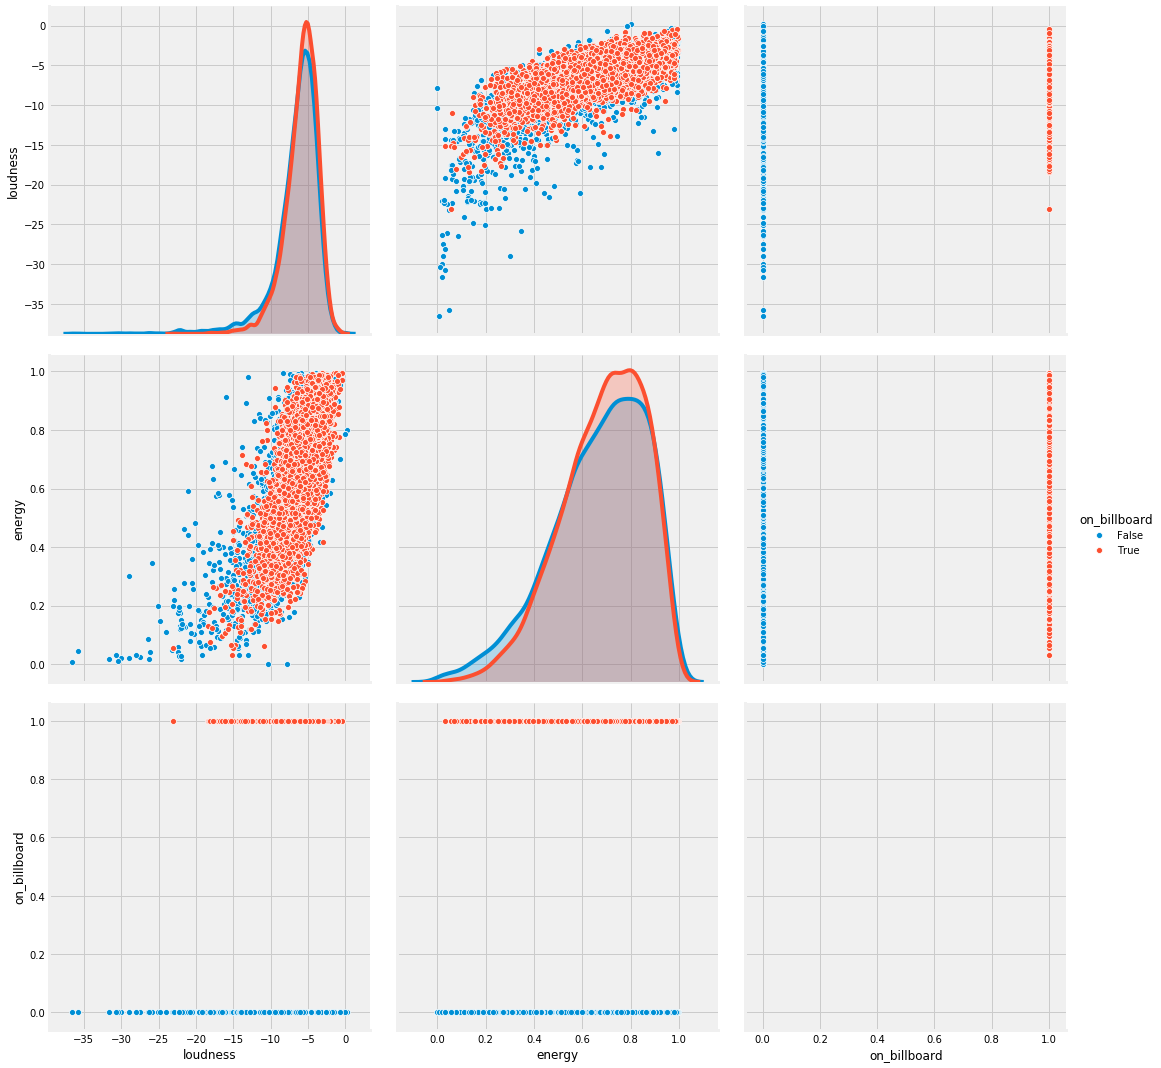

In [48]:
# seaborn.pairplot(df[['loudness', 'energy', 'on_billboard']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'norm_sentiment', 'rel_sentiment', 'popularity']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'wordcount', 'speechiness']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'norm_sentiment', 'rel_sentiment', 'valence']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'album_popularity']], hue='on_billboard', height=5)

In [54]:
np.sum(df.release_date_precision=='year')

799

In [55]:
np.sum(df.release_date_precision=='day')

12702

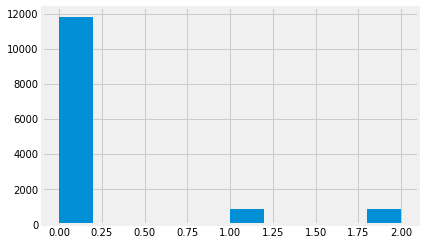

In [127]:
# df.album_type.apply(lambda t:{'album':0, 'single':1, 'compilation':2}[t]).hist()

# df.total_tracks.hist(bins=50)

# df.disc_number.hist()

# ((df.duration_ms)/60000).hist(bins=100)

# df.explicit.astype(int).hist()

# df.popularity.hist(bins=30)

# df.track_number.hist(bins=100)

# df.danceability.hist(bins=30)

# df.energy.hist(bins=30)

# df.acousticness.hist(bins=30)

# df.key.hist()

# df.loudness.hist(bins=30)

# df['mode'].hist()

# df.speechiness.hist(bins=30)

# df.instrumentalness.hist(bins=30)

# df.liveness.hist(bins=30)

# df.valence.hist(bins=30)

# df.tempo.hist(bins=30)

# df.time_signature.hist()

# df.wordcount.hist(bins=30)

# df.album_popularity.hist(bins=30)

# df.on_billboard.astype(int).hist()

# df.norm_sentiment.hist(bins=30)

# (df.rel_sentiment).hist(bins=30)

# df.release_year.hist(bins=30)

# df.release_month.hist(bins=12)



### Label transform

In [194]:
bbd = pipe.BillboardData() 
bbd.load()
bbd.transform_for_models()

In [197]:
bbd.dummyize_record_label()
df = bbd.df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49761 entries, 0 to 49760
Columns: 759 entries, album_type to label_zone4inc
dtypes: bool(2), float64(13), int64(9), object(1), uint8(734)
memory usage: 45.3+ MB


In [198]:
tdf = df.copy()


In [204]:
tdf.columns[24]

'lt_12_label'

In [207]:
labelcounts = [np.sum(tdf[tdf.on_billboard][column]) for column in tdf.columns[24:]]

Text(0.5, 0, 'Billboard Hit Count')

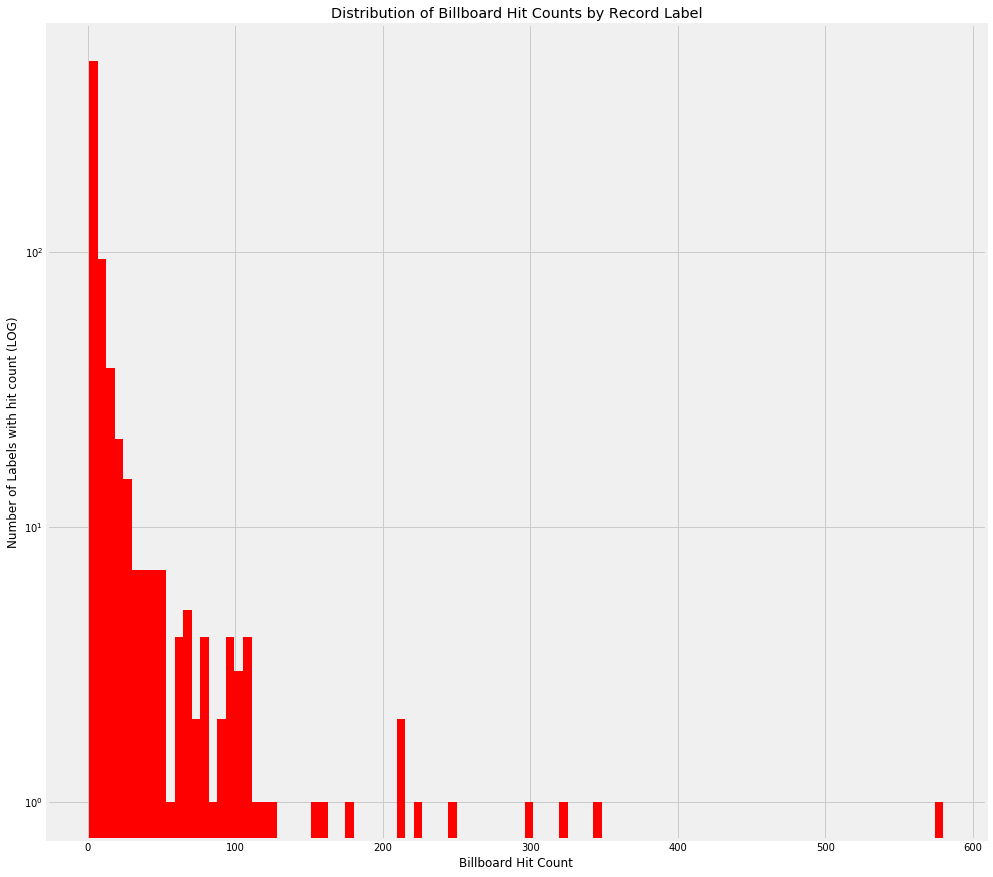

In [213]:
fig, ax = plt.subplots(figsize=(15,15))
ax.hist(labelcounts, bins=100, color='red')
ax.set_yscale('log')
ax.set_title('Distribution of Billboard Hit Counts by Record Label')
ax.set_ylabel('Number of Labels with hit count (LOG)')
ax.set_xlabel('Billboard Hit Count')

Text(0, 0.5, 'No. Record labels')

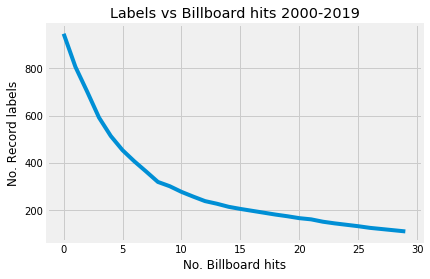

In [164]:
x = np.arange(0, 30)
y = np.array([np.sum([np.sum(tdf[column])>i for column in tdf.columns[54:]]) for i in x])

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Labels vs Billboard hits 2000-2019')
ax.set_xlabel('No. Billboard hits')
ax.set_ylabel('No. Record labels')

In [165]:
tdf.columns[55]

'label_12tonemusic'

In [166]:
n = 12
lt_label=f'lt_{n}_label'
tdf.insert(53, lt_label, 0)

In [167]:
for column in tdf.columns[55:]:
    if np.sum(tdf[column]) < 12:
        tdf[lt_label] = tdf[lt_label]+tdf[column]
        tdf.drop(columns=[column], inplace=True)

In [168]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Columns: 313 entries, index to label_zone4
dtypes: bool(2), float64(11), int64(267), object(1), uint8(32)
memory usage: 29.2+ MB


In [179]:
np.sum(tdf.lt_12_label>0)

2492

In [213]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 56 columns):
index                     13501 non-null int64
total_tracks              13501 non-null int64
disc_number               13501 non-null int64
duration_ms               13501 non-null int64
explicit                  13501 non-null uint8
popularity                13501 non-null int64
track_number              13501 non-null int64
danceability              13501 non-null float64
energy                    13501 non-null float64
acousticness              13501 non-null float64
loudness                  13501 non-null float64
mode                      13501 non-null int64
speechiness               13501 non-null float64
instrumentalness          13501 non-null float64
liveness                  13501 non-null float64
valence                   13501 non-null float64
tempo                     13501 non-null float64
wordcount                 13501 non-null float64
label                    

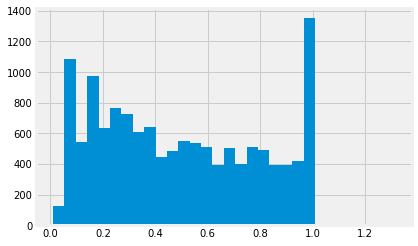

In [214]:
df.track_placement.hist(bins=30)

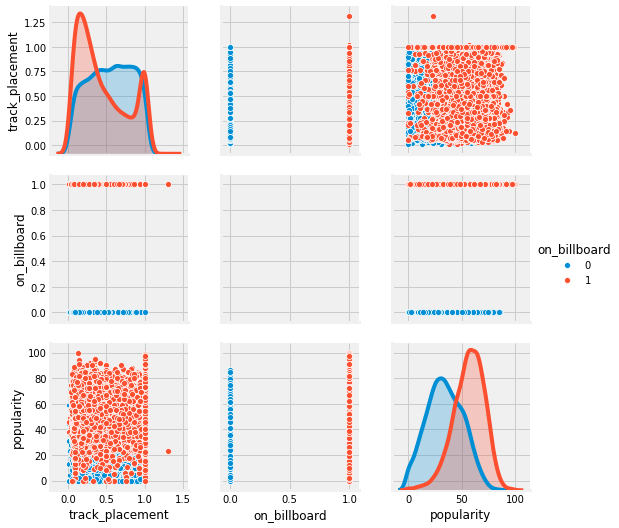

In [210]:
seaborn.pairplot(df[['track_placement', 'on_billboard', 'popularity']], hue='on_billboard')

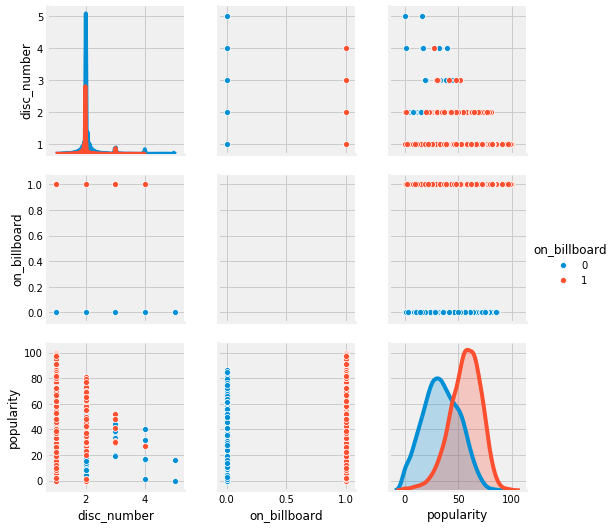

In [218]:
seaborn.pairplot(df[['disc_number', 'on_billboard', 'popularity']], hue='on_billboard')

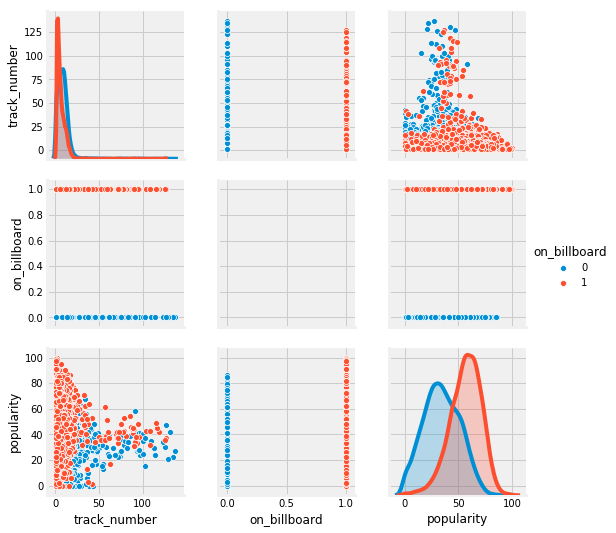

In [219]:
seaborn.pairplot(df[['track_number', 'on_billboard', 'popularity']], hue='on_billboard')

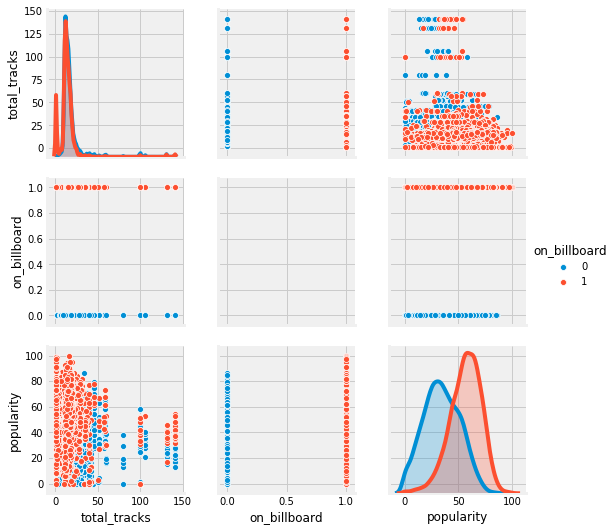

In [220]:
seaborn.pairplot(df[['total_tracks', 'on_billboard', 'popularity']], hue='on_billboard')

### Transform labels to counts of fits instead

In [22]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [43]:
defd['19recordings']

7

In [59]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()

In [60]:
bbd.transform_label_to_labelhitcount()
df = bbd.df

In [ ]:
df.label

Getting yearcounts

In [67]:
df1 = pipe.BillboardData().load_spotify_billboard_data()

In [69]:
df1['year'] = pd.to_datetime(df1.release_date, format='%Y-%m-%d').apply(lambda d:d.year)

In [76]:
d = df1[df1.year>=2000].groupby('year').count()['obj_id'].to_dict()

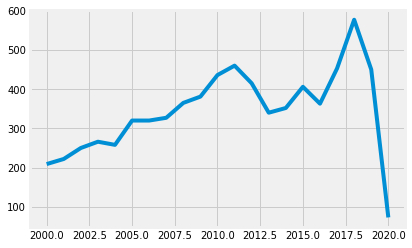

In [78]:
plt.plot(d.keys(), d.values())

### Plotting how values change over year

In [174]:
bbd = pipe.BillboardData() 
bbd.load(1)
bbd.drop_no_lyrics()
df1=bbd.df.copy()
bbd.balance_class_year()
bbd.transform_for_models()
bbd.transform_label_to_labelhitcount()
df3 = bbd.df.copy()

In [182]:
bbdf = bbd.load_spotify_billboard_data()

In [184]:
bbdf.shape

(7384, 26)

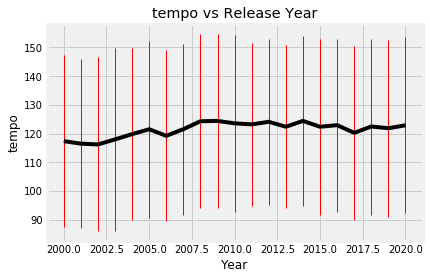

In [269]:
plotbyyear(df3[df3.release_year>=2000], 'tempo', None)

In [235]:
monthdf = df1.copy()

In [236]:
monthdf['month'] = pd.to_datetime(monthdf.release_date).apply(lambda d: d.month)

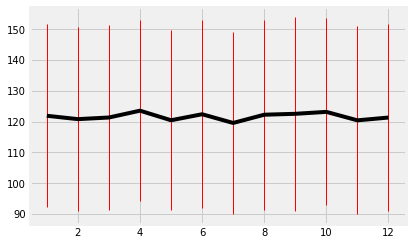

In [261]:
plotbymonth(monthdf[monthdf.release_date>='1999'], 'tempo', None)

In [241]:
ax.errorbar()

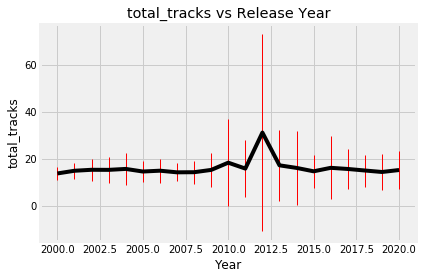

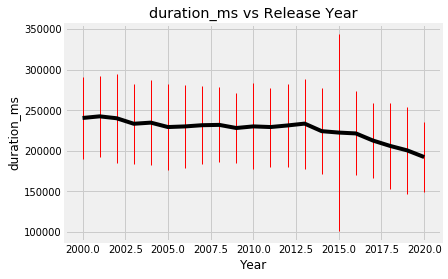

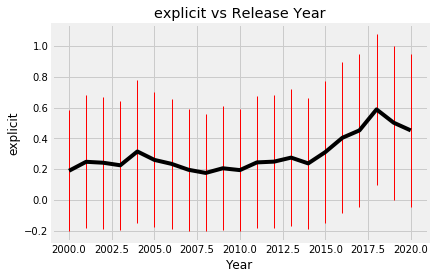

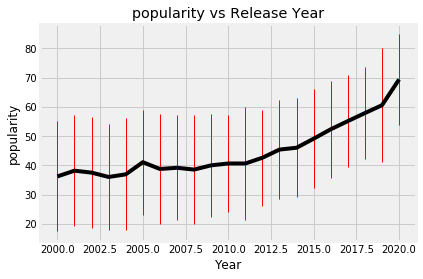

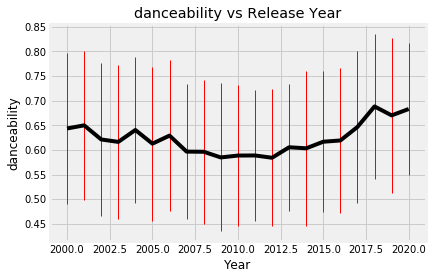

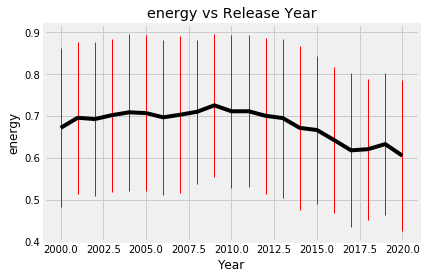

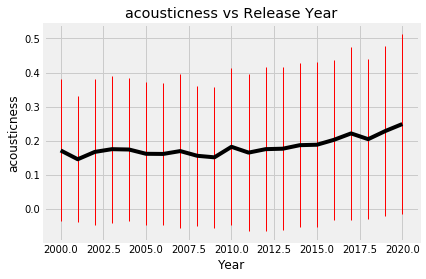

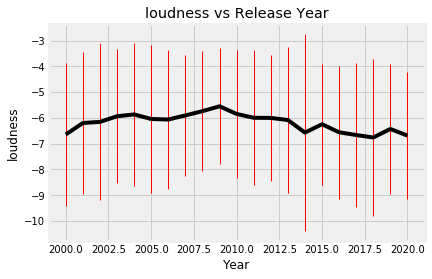

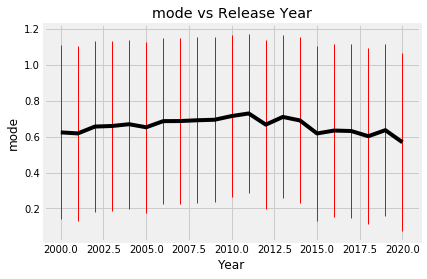

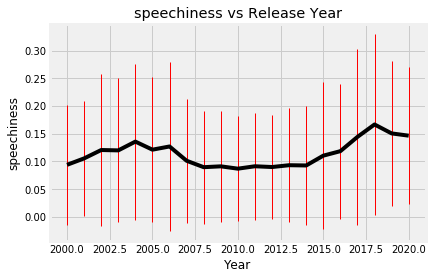

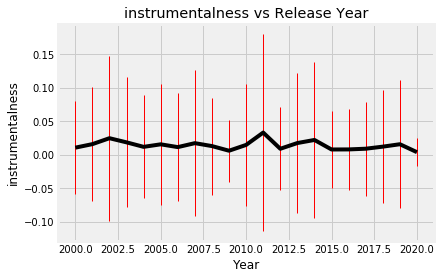

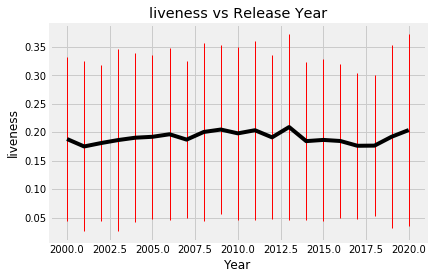

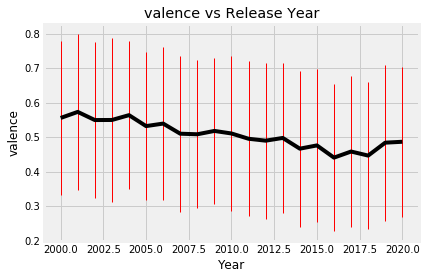

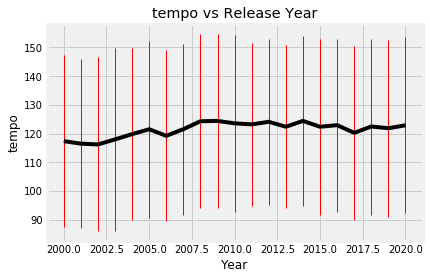

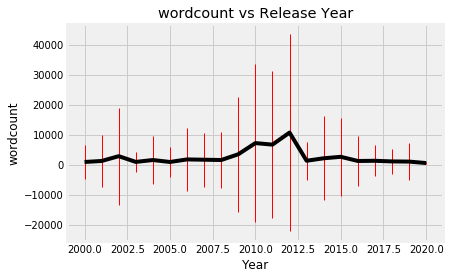

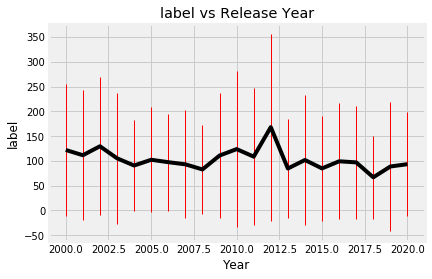

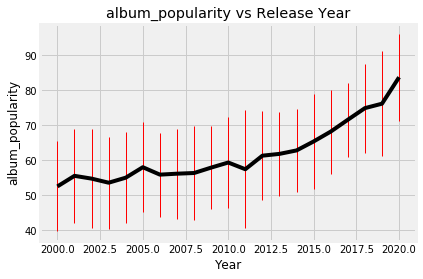

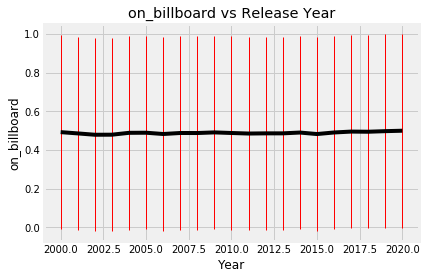

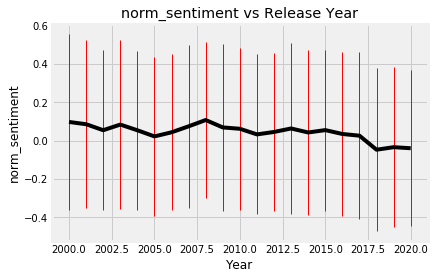

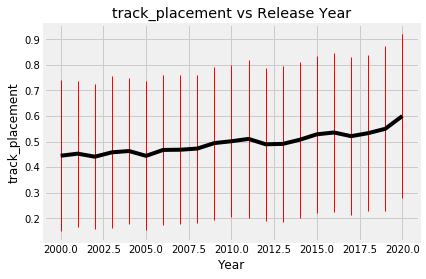

In [273]:
for c in df3.columns[:21]:
    if c != 'release_year':
        plotbyyear(df3[df3.release_year>=2000], c, None)

In [272]:
df3.columns[:21]

Index(['total_tracks', 'duration_ms', 'explicit', 'popularity', 'danceability',
       'energy', 'acousticness', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'wordcount',
       'label', 'album_popularity', 'on_billboard', 'norm_sentiment',
       'release_year', 'track_placement'],
      dtype='object')

In [10]:
import joypy
from matplotlib import cm

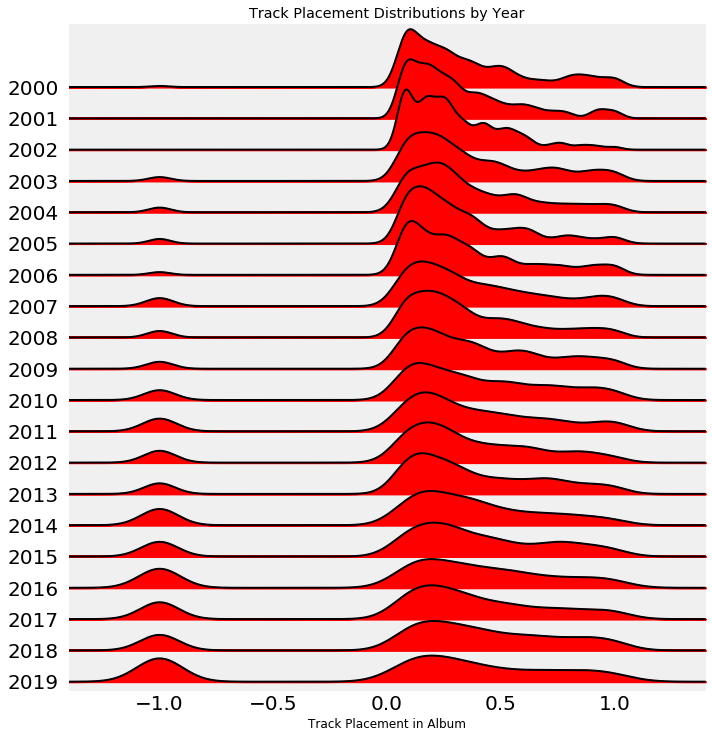

In [192]:
print()
print()
joystyle={
    'overlap':1,
    'fade':None,
    'linewidth':2,
    'figsize':(10,10),
#     'title':'Total Tracks by Year',
#     'x_range':range(-5,50),
    'xlabelsize':20,
    'ylabelsize':20,
    'color':'red',
    'bw_method':0.15,
}
fig, axes = joypy.joyplot(df3[(df3.on_billboard)&(df3.release_year>=2000)&(df3.release_year<2020)][['release_year', 'track_placement']], 
                          by='release_year', column='track_placement', **joystyle
)
# plt.xlabel('Total Tracks')
plt.ylabel('Year')
plt.xlabel('Track Placement in Album')
plt.title('Track Placement Distributions by Year')
plt.show()
print()
print()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:270: UserWarning: The data contains a group with a single distinct value (1) having infinite probability density. Consider using a different visualization.
  "Consider using a different visualization.".format(val))
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:50: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  ax.set_xlim([min(x_range), max(x_range)])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:270: UserWarning: The data contains a group with a single distinct value (1) having infinite probability density. Consider using a different visualization.
  "Consider using a different visualization.".format(val))
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:50: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.


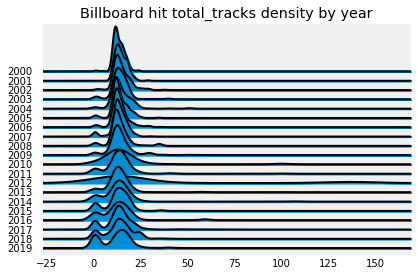

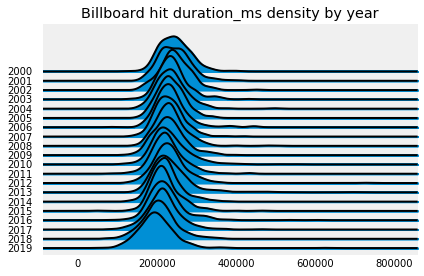

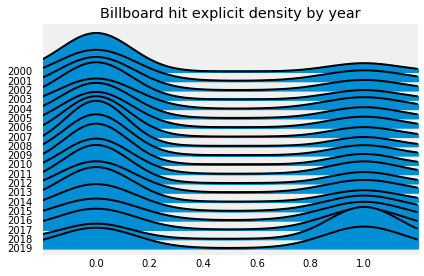

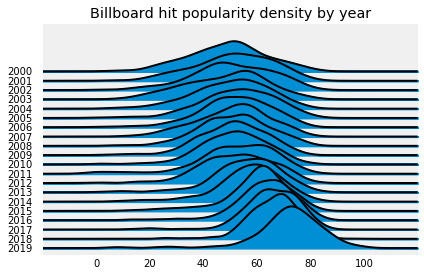

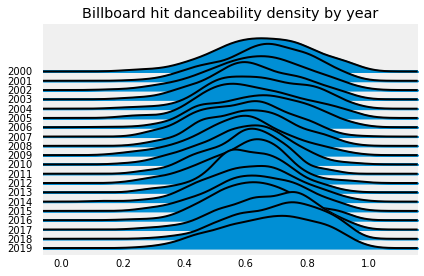

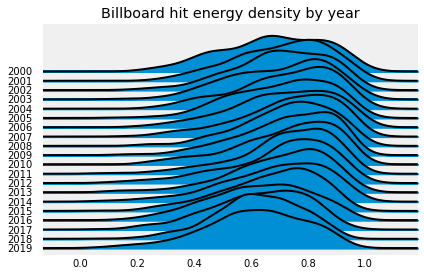

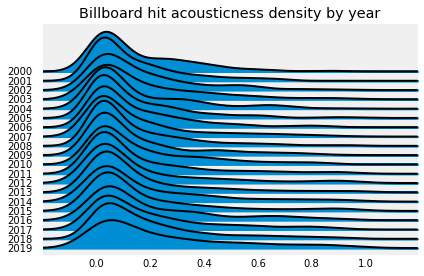

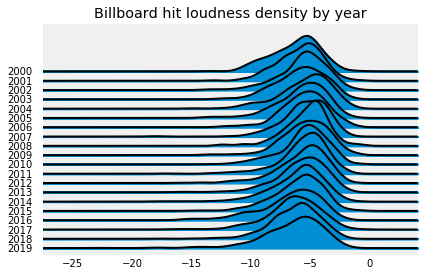

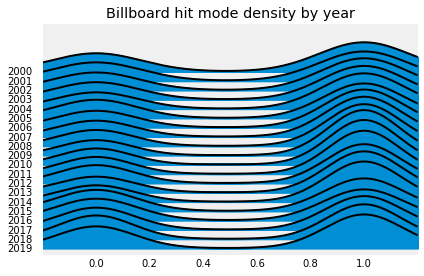

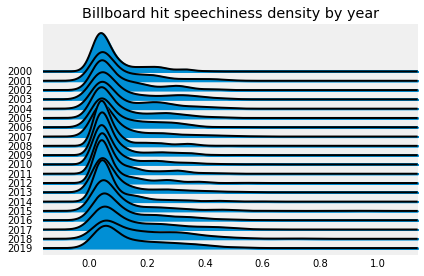

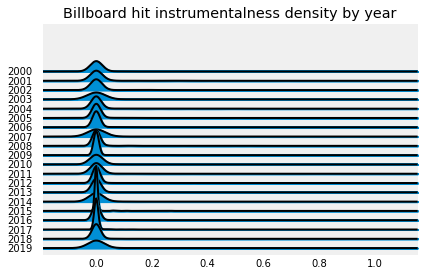

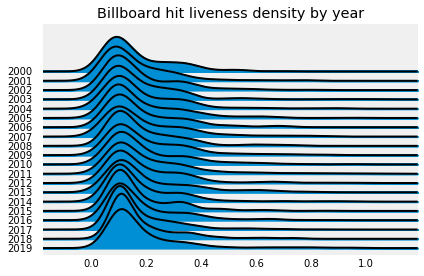

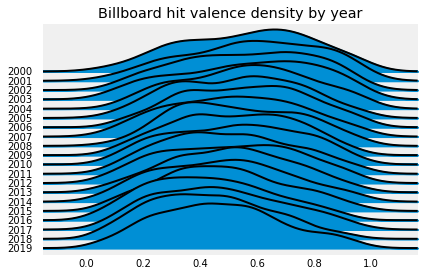

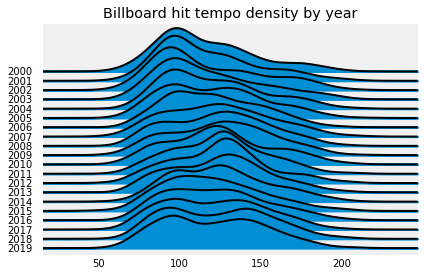

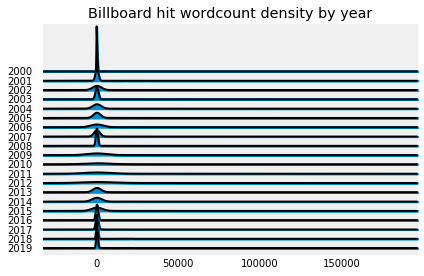

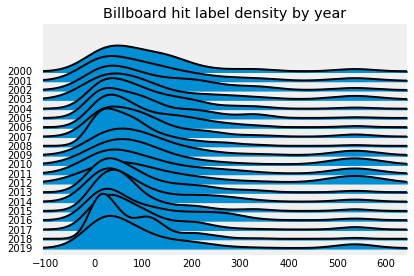

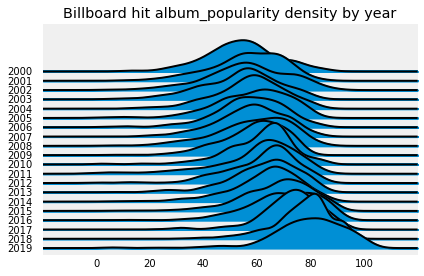

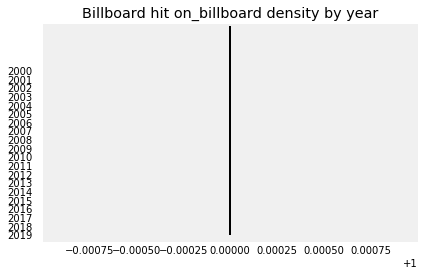

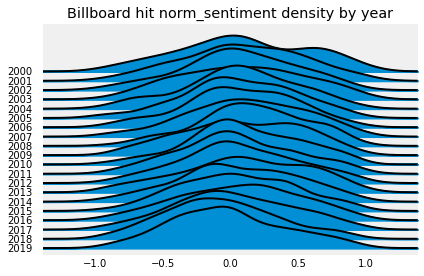

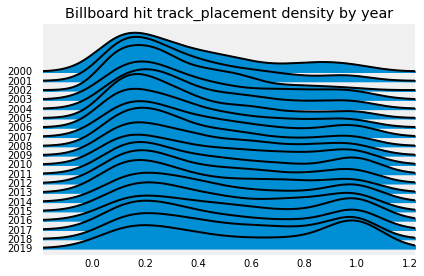

In [291]:
joystyle={
    'overlap':1,
    'fade':None,
    'linewidth':2,
}
for col in df3.columns[:21]:
    if col == 'release_year':
        continue
    _ = joypy.joyplot(df3[['release_year', col]][
            (df3.release_year>=2000)&(df3.release_year<2020)&(df3.on_billboard==1)], 
        by='release_year', column=col, **joystyle, title=f'Billboard hit {col} density by year'
    )

In [300]:
df1['energy'].dtype ==float

True

## Exploring the fidelity of matches

In [310]:
df1.columns

Index(['artist', 'album_id', 'album_type', 'total_tracks', 'release_date',
       'release_date_precision', 'disc_number', 'duration_ms', 'explicit',
       'track_id', 'title', 'popularity', 'track_number', 'danceability',
       'energy', 'acousticness', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'obj_id', 'response_artist', 'response_title', 'poscount', 'negcount',
       'wordcount', 'label', 'album_popularity', 'bb_artist', 'bb_title',
       'date_entered_bb', 'peakPos', 'weeks'],
      dtype='object')

In [ ]:
bbmask = ~df1.obj_id.isna()

In [340]:
wlyricsmask = ~df1.response_artist.isna()

In [374]:
df1.title = df1.title.apply(str.lower)
df1.artist = df1.artist.apply(str.lower)
df1.response_title = df1.response_title.apply(lambda s: str(s).lower())
df1.response_artist = df1.response_artist.apply(lambda s: str(s).lower())

In [375]:
print('Spotify-Genius')
print('Artist Exact match accuracy:',df1[(df1.artist==df1.response_artist)].shape[0]/df1.shape[0])
df1[~(df1.artist==df1.response_artist)][['artist', 'response_artist']].head()

Spotify-Genius
Artist Exact match accuracy: 0.8660012306009435


artist         response_artist
0   "weird al" yankovic                     nan
1   "weird al" yankovic                     nan
2   "weird al" yankovic     “weird al” yankovic
19             2 chainz  2 chainz & wiz khalifa
50                 2pac          thomas millard

In [378]:
print('Spotify-Genius')
print('Title Exact match accuracy:',df1[
    (df1.title==df1.response_title)
    & wlyricsmask
].shape[0]/df1.shape[0])
df1[~(df1.title==df1.response_title)& wlyricsmask][['title', 'response_title']].head()

Spotify-Genius
Title Exact match accuracy: 0.6907773295959527


title                     response_title
5    it's gonna be me                   it’s gonna be me
12      it's over now                      it’s over now
13  peaches and cream  peaches and cream (dj clue remix)
15          hot & wet            all my love (hot & wet)
17      i'm different                      i’m different

In [377]:
print('Spotify-Genius')
print(
    'Artist and title Exact match accuracy:',
    df1[
        (df1.title==df1.response_title)
        &(df1.artist==df1.response_artist)
        & wlyricsmask
    ].shape[0]/df1[wlyricsmask].shape[0]
)
df1[
    ((df1.title!=df1.response_title)
    | (df1.artist!=df1.response_artist))
    & wlyricsmask
][['title', 'response_title','artist', 'response_artist']].head(20)

Spotify-Genius
Artist and title Exact match accuracy: 0.6803215658860539


title  \
2                                 word crimes   
5                            it's gonna be me   
12                              it's over now   
13                          peaches and cream   
15                                  hot & wet   
17                              i'm different   
19                 we own it (fast & furious)   
20       rule the world (feat. ariana grande)   
22                                it's a vibe   
24  momma i hit a lick (feat. kendrick lamar)   
29                  whip (feat. travis scott)   
30                                it's a vibe   
33      bigger than you (feat. drake & quavo)   
36                                      a lot   
37                                       asmr   
38                             all my friends   
40                               break da law   
41                     can't leave without it   
43                                  gun smoke   
45                                    monster   

                       response_title               artist  \
2                         word crimes  "weird al" yankovic   
5                    it’s gonna be me               *nsync   
12                      it’s over now                  112   
13  peaches and cream (dj clue remix)                  112   
15            all my love (hot & wet)                  112   
17                      i’m different             2 chainz   
19         we own it (fast & furious)             2 chainz   
20                     rule the world             2 chainz   
22                        it’s a vibe             2 chainz   
24                 momma i hit a lick             2 chainz   
29                               whip             2 chainz   
30                        it’s a vibe             2 chainz   
33                    bigger than you             2 chainz   
36                             ​a lot            21 savage   
37                              ​asmr            21 savage   
38                    ​all my friends            21 savage   
40                      ​break da law            21 savage   
41            ​can’t leave without it            21 savage   
43                         ​gun smoke            21 savage   
45                           ​monster            21 savage   

           response_artist  
2      “weird al” yankovic  
5                   *nsync  
12                     112  
13                     112  
15                     112  
17                2 chainz  
19  2 chainz & wiz khalifa  
20                2 chainz  
22                2 chainz  
24                2 chainz  
29                2 chainz  
30                2 chainz  
33                2 chainz  
36               21 savage  
37               21 savage  
38               21 savage  
40               21 savage  
41               21 savage  
43               21 savage  
45               21 savage

In [361]:
i=11

In [362]:
df1.iloc[i].artist

'112'

In [363]:
df1.iloc[i].response_artist

'112'

In [364]:
df1.iloc[i].title

'Dance with Me'

In [365]:
df1.iloc[i].response_title

'Dance With Me'

In [143]:
bbd = pipe.BillboardData() 
bbd.load(1)
bbd.drop_no_lyrics()
df1=bbd.df.copy()
bbd.balance_class_year()
bbd.transform_for_models()
bbd.transform_label_to_labelhitcount()

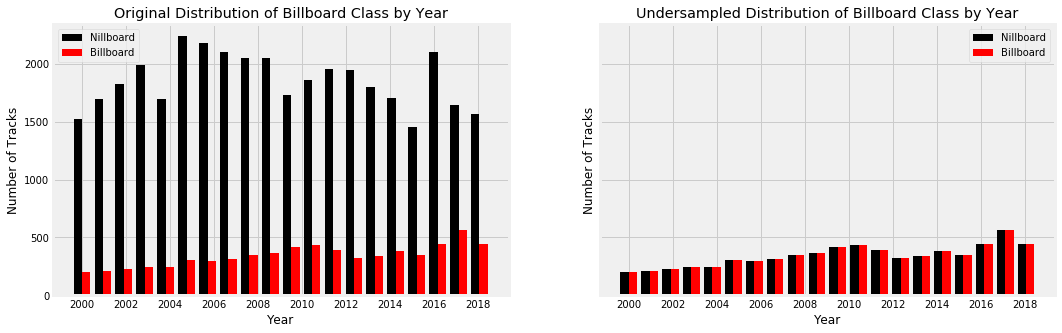

In [159]:
fig, axs = plt.subplots(1,2, figsize=(16,5), sharey=True)

bbmask = (~df1.obj_id.isna())
df1.release_date = pd.to_datetime(df1.release_date, format="%Y-%m-%d")
df1["release_year"] = df1.release_date.apply(lambda dt: dt.year)

yearmask = (df1.release_year > 1999) & (df1.release_year<2020)
bb = df1.release_year[bbmask & yearmask]
nb = df1.release_year[~bbmask & yearmask]


ax=axs[0]
ax.hist([nb,bb], label=['Nillboard', 'Billboard'], bins=20, align='left', color=['black', 'red'])
ax.set_title('Original Distribution of Billboard Class by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Tracks')
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))
ax.legend()

bbmask = (bbd.df.on_billboard)
yearmask = (bbd.df.release_year > 1999) & (bbd.df.release_year<2020)
bb = bbd.df.release_year[bbmask & yearmask]
nb = bbd.df.release_year[~bbmask & yearmask]
ax=axs[1]
ax.hist([nb,bb], label=['Nillboard', 'Billboard'], bins=20, align='left', color=['black', 'red'])
ax.set_title('Undersampled Distribution of Billboard Class by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Tracks')
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))
ax.legend()


In [71]:
from matplotlib.ticker import MaxNLocator, AutoLocator

#  test revamp


In [231]:
bbd = pipe.BillboardData() 
bbd.load()
bbd.drop_no_lyrics()
bbd.balance_class_year()
bbd.transform_for_models()
testdf = bbd.split_test()
bbd.transform_label_to_hitcount()
testdf = bbd.transform_label_to_hitcount(testdf=testdf)

In [233]:
testdf

album_type  total_tracks  duration_ms  explicit  popularity  \
3686         album            14       254200      True          65   
1077         album            15       169866     False          57   
9359         album            14       171266     False          47   
11930        album            16       245373      True          29   
7207         album            16       197411     False          72   
3893         album            14       221546      True          48   
2539   compilation           141       208573     False          48   
12643        album            13       306360     False          32   
710          album            15       263800     False          53   
13575        album            29       198200     False          46   
6330        single             1       201573     False          99   
2560         album            13       249773     False          53   
11282        album            16       252760     False          65   
4701         album             7       238946      True          44   
6431         album            14       235760     False          42   
11804        album            30        63481     False          15   
5076         album            11       207733     False          65   
9119   compilation           100       226946     False          29   
5747         album            12       229573     False          52   
9012         album            18       213373      True          38   
8550         album            14       215466     False          19   
1807         album            19       277386      True          70   
2404   compilation           100       180760     False          41   
11004        album            15       177733     False          19   
12129        album            15       214000     False           9   
3391         album            10       155893     False          53   
4517         album            12       193800     False          48   
7858   compilation            80       224920     False          38   
11587        album            15       248160     False          15   
2105         album            13       236746     False          47   
...            ...           ...          ...       ...         ...   
11651        album            25       356000      True          46   
9775         album            14       252253     False          49   
10232        album            18       244000     False          18   
13458        album            19       201893      True          58   
2544   compilation           106       225346     False          53   
4882         album            13       213906     False          35   
2080   compilation            15       220840     False          54   
558          album            13       221093      True          74   
3093   compilation            11       229800     False          59   
6086         album            20       403920     False          53   
13771        album            11       444306     False          34   
8261         album            14       330000      True          45   
6733        single             1       251989      True          70   
7034        single             1       235497     False          73   
8177         album            15       253440      True          19   
5386         album            20       255360      True          51   
683          album            14       246560     False          37   
13156  compilation            16       315400     False           8   
12671        album            17       231280     False          29   
2986         album            15       203293     False          64   
11891  compilation            14       177560     False          41   
9408         album            18       289733      True          12   
6886         album            17       196600      True          61   
9364         album            14       279533     False          27   
9488         album            12

In [218]:
bbd.df.label.apply()

(12528, 40)

In [80]:
bbd.transform_for_models()
bbd.transform_label_to_labelhitcount()

In [81]:
bbd.df.head()

total_tracks  duration_ms  explicit  popularity  danceability  energy  \
0            12       143040     False          42         0.543   0.697   
1            12       170640     False          53         0.791   0.613   
2            12       223120     False          48         0.897   0.430   
3            12       200400     False          70         0.610   0.926   
4            13       292000     False          53         0.704   0.409   

   acousticness  loudness  mode  speechiness  ...  release_month_3.0  \
0       0.00206    -9.211     1       0.0612  ...                  0   
1       0.09860   -11.628     0       0.0763  ...                  0   
2       0.01180   -12.759     1       0.0551  ...                  0   
3       0.03100    -4.843     0       0.0479  ...                  1   
4       0.43000    -8.581     0       0.0597  ...                  0   

   release_month_4.0  release_month_5.0  release_month_6.0  release_month_7.0  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  0   
4                  0                  0                  0                  1   

   release_month_8.0  release_month_9.0  release_month_10.0  \
0                  0                  1                   0   
1                  0                  1                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   release_month_11.0  release_month_12.0  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 53 columns]

In [82]:
bbd.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49761 entries, 0 to 49760
Data columns (total 53 columns):
total_tracks              49761 non-null int64
duration_ms               49761 non-null int64
explicit                  49761 non-null bool
popularity                49761 non-null int64
danceability              49761 non-null float64
energy                    49761 non-null float64
acousticness              49761 non-null float64
loudness                  49761 non-null float64
mode                      49761 non-null int64
speechiness               49761 non-null float64
instrumentalness          49761 non-null float64
liveness                  49761 non-null float64
valence                   49761 non-null float64
tempo                     49761 non-null float64
wordcount                 45528 non-null float64
label                     49761 non-null int64
album_popularity          49761 non-null int64
on_billboard              49761 non-null bool
release_year              4

In [85]:
bbd.df.on_billboard

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
45498    False
45499    False
45500    False
45501    False
45502    False
45503    False
45504    False
45505    False
45506    False
45507    False
45508    False
45509    False
45510    False
45511    False
45512    False
45513    False
45514    False
45515    False
45516    False
45517    False
45518    False
45519    False
45520    False
45521    False
45522    False
45523    False
45524    False
45525    False
45526    False
45527    False
Name: on_billboard, Length: 45528, dtype: bool

In [86]:
bbd.df[bbd.df.on_billboard].groupby('release_year').count()['popularity'].to_dict()

{1947: 2,
 1957: 1,
 1959: 2,
 1963: 4,
 1965: 1,
 1966: 1,
 1970: 3,
 1972: 1,
 1980: 1,
 1984: 2,
 1987: 1,
 1988: 1,
 1989: 1,
 1990: 1,
 1991: 3,
 1994: 1,
 1995: 1,
 1996: 2,
 1998: 7,
 1999: 95,
 2000: 203,
 2001: 210,
 2002: 230,
 2003: 245,
 2004: 247,
 2005: 307,
 2006: 299,
 2007: 312,
 2008: 348,
 2009: 368,
 2010: 416,
 2011: 434,
 2012: 393,
 2013: 322,
 2014: 339,
 2015: 379,
 2016: 350,
 2017: 445,
 2018: 565,
 2019: 446,
 2020: 73}

In [160]:
bbd = pipe.BillboardData() 
bbd.load(1)
bbd.drop_no_lyrics()
bbd.transform_for_models()
bbd.transform_label_to_labelhitcount()

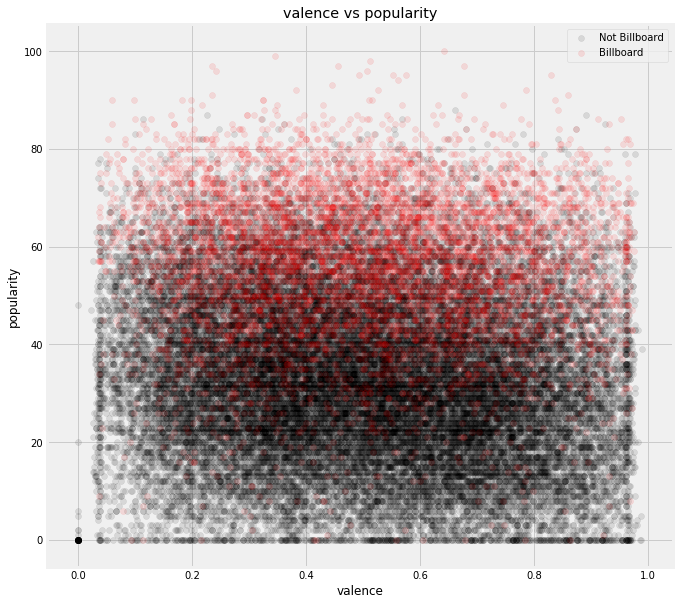

In [164]:

plot_2feat('valence', 'popularity')

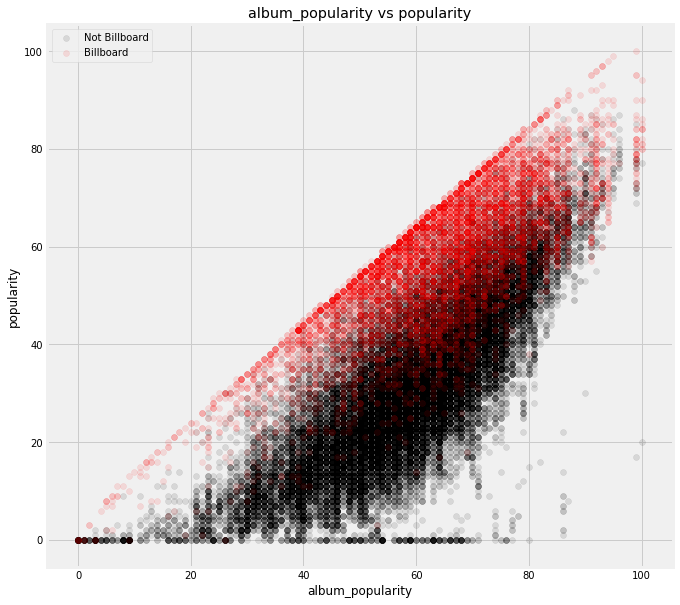

In [122]:
plot_2feat('album_popularity', 'popularity')

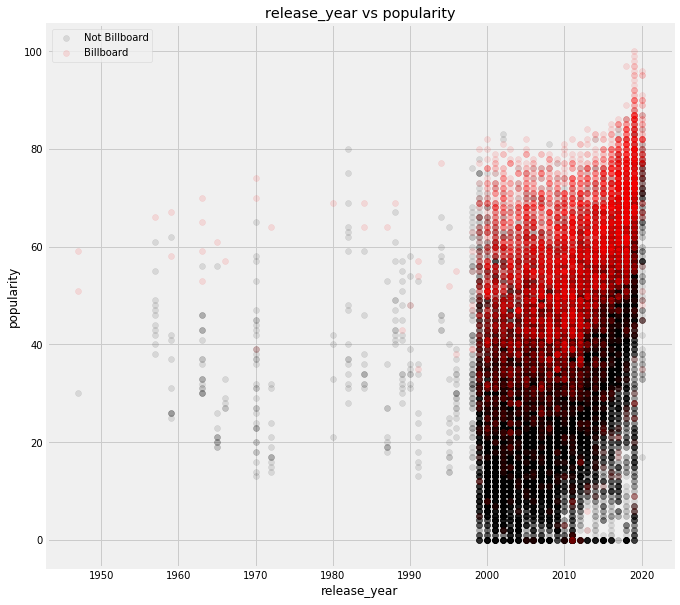

In [127]:
plot_2feat('release_year', 'popularity')

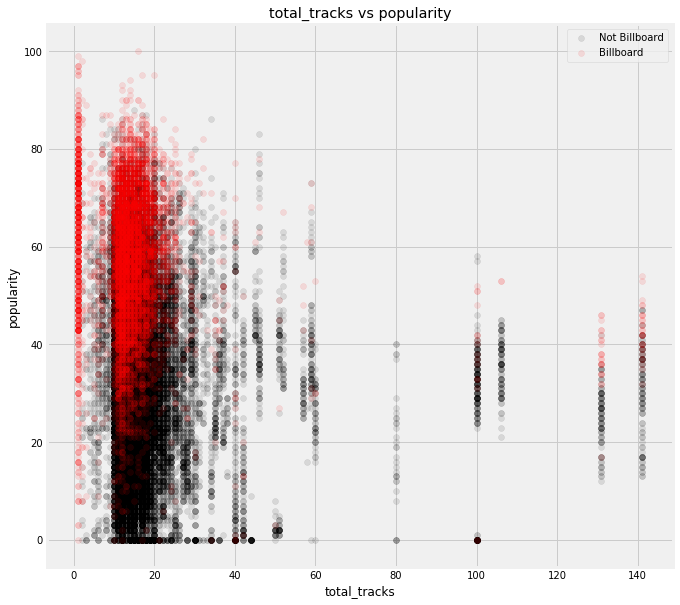

In [128]:
plot_2feat('total_tracks', 'popularity')

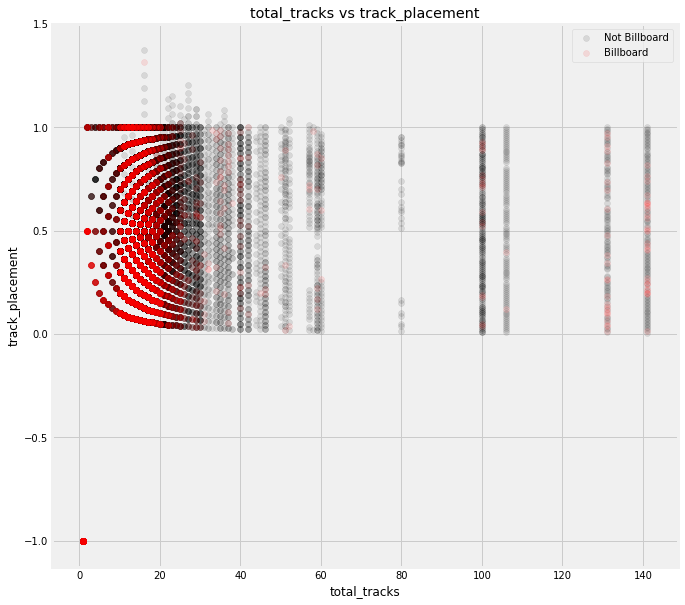

In [129]:
plot_2feat('total_tracks', 'track_placement')

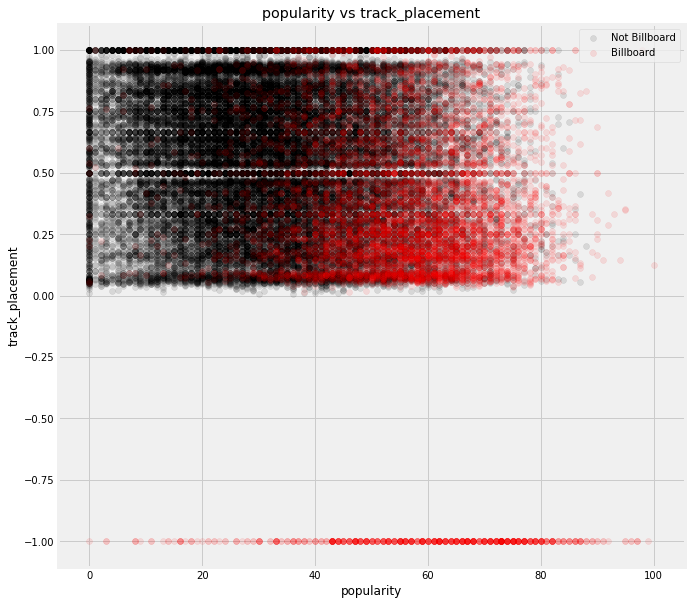

In [166]:
ax = plot_2feat('popularity', 'track_placement')

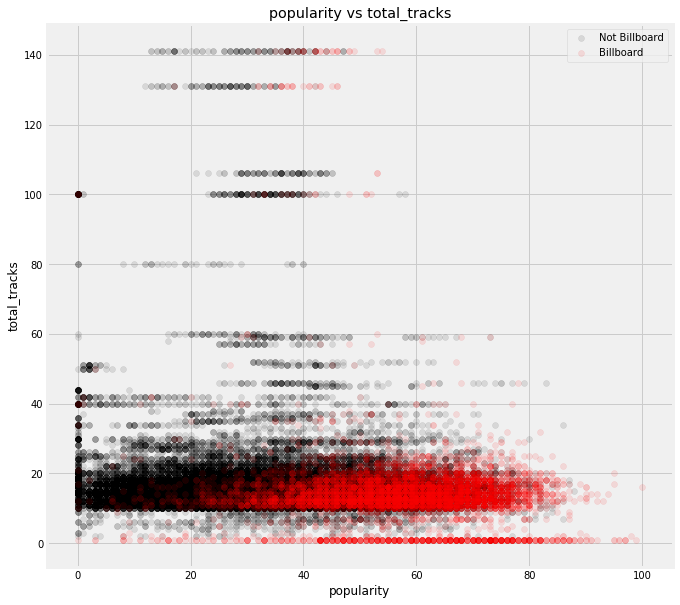

In [139]:
plot_2feat('popularity', 'total_tracks')

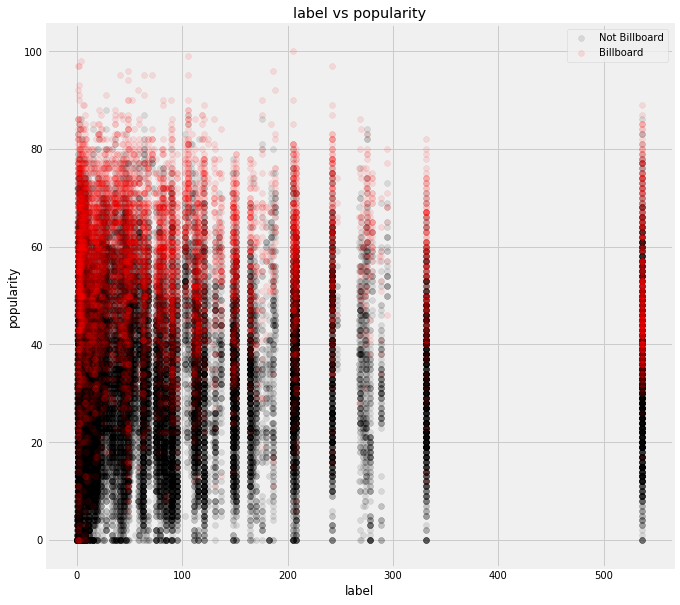

In [130]:
plot_2feat('label', 'popularity')

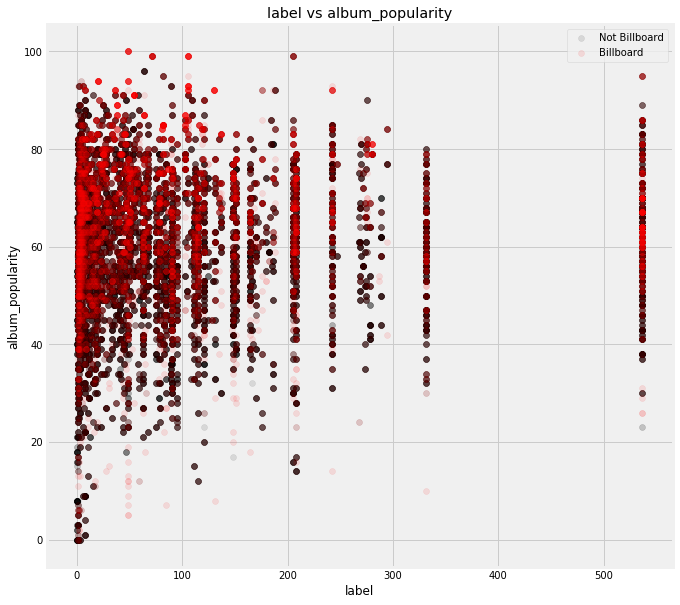

In [135]:
plot_2feat('label', 'album_popularity')

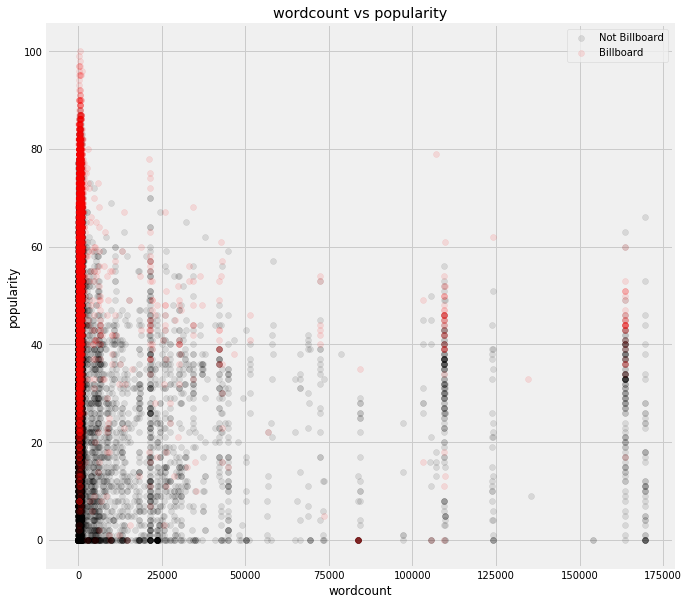

In [131]:
plot_2feat('wordcount', 'popularity')

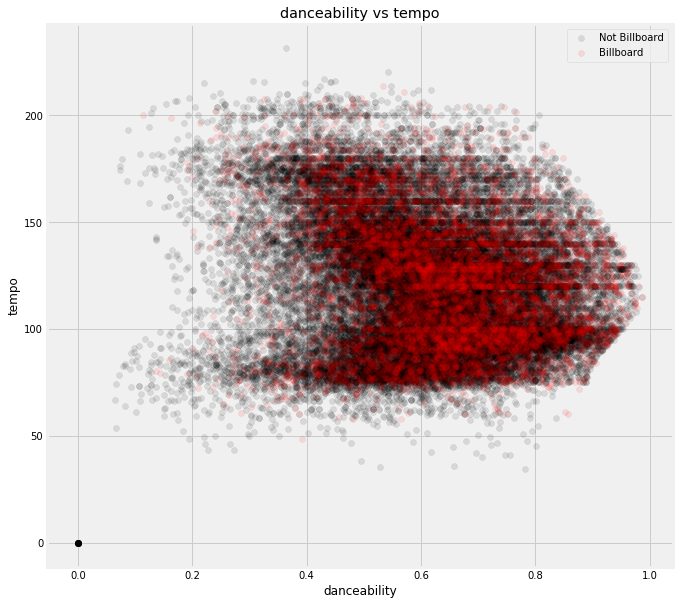

In [132]:
plot_2feat('danceability', 'tempo')

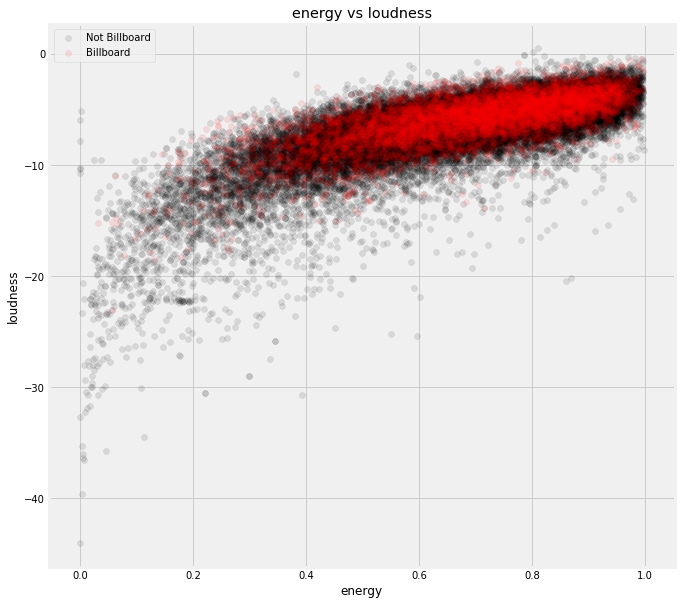

In [167]:
plot_2feat('energy', 'loudness')

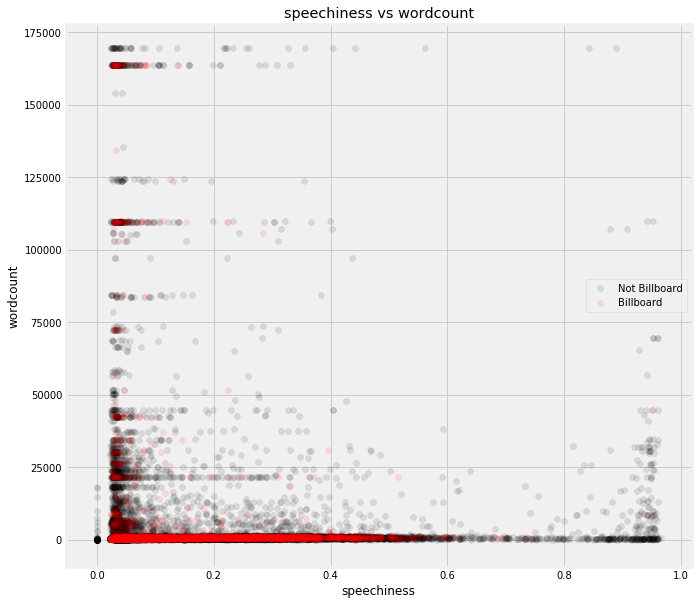

In [133]:
plot_2feat('speechiness', 'wordcount')

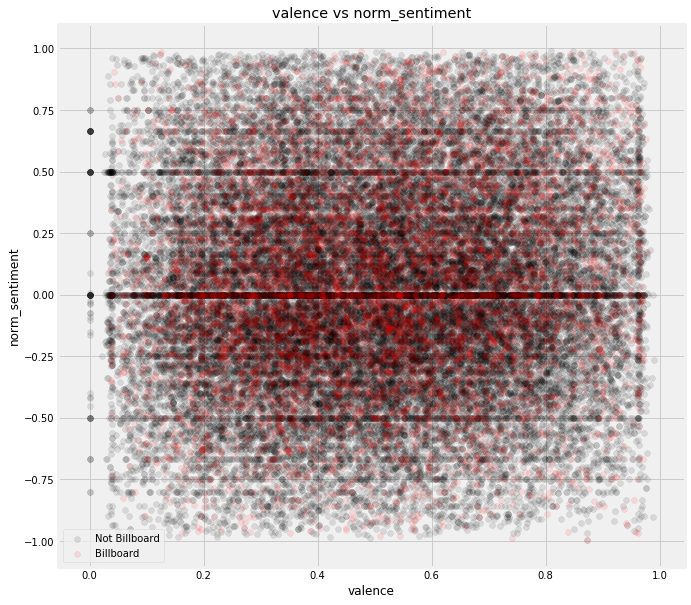

In [134]:
plot_2feat('valence', 'norm_sentiment')

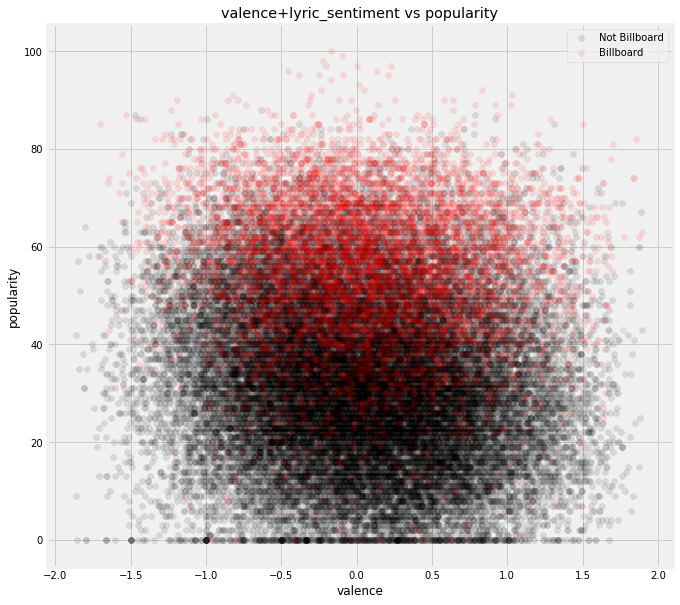

In [173]:
xax='valence'
yax='popularity'
bbstyle = {
    'label':'Billboard',
    'color':'red',
    'alpha':0.1
}
nbstyle = {
    'label':'Not Billboard',
    'color':'black',
    'alpha':0.1,
}

fig, ax = plt.subplots(figsize=(10,10))

bbmask = bbd.df.on_billboard
ax.scatter((2*bbd.df[~bbmask][xax]-1)+bbd.df[~bbmask]['lyric_sentiment'], bbd.df[~bbmask][yax], **nbstyle)
ax.scatter((bbd.df[bbmask][xax]*2-1)+bbd.df[bbmask]['lyric_sentiment'], bbd.df[bbmask][yax], **bbstyle)
ax.set_xlabel(xax)
ax.set_ylabel(yax)
ax.set_title(xax+'+lyric_sentiment vs '+yax)

ax.legend()

In [228]:
type(None)==type(None)

True

In [226]:
nt.mro

<function NoneType.mro()>

In [227]:
type.NoneType

AttributeError: type object 'type' has no attribute 'NoneType'